In [75]:
#Name: Pranjal Nawarkar
#WSU ID: y478x356

In [76]:
# Problem Statement:
# In this assignment, I am solving a a classification problem using a deep neural network. the classification problem is to categorize images of fashion items.
# Specifically, I will be using the Fashion MNIST dataset, where task is to classify fashion images
# into 10 different categories. Each class corresponds to a specific type of clothing or accessory.
# I am implementing a deep neural network using Keras' functional API as mentioned in assignment,
# train the model, evaluate its performance on a test set, and visualize the training history.

#The 10 classes in the Fashion MNIST dataset are typically: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot..

#The model implemented aims to learn the relationships between the pixel values in the input images and the corresponding classes.
#After training, the model is classifying unseen images of fashion items into one of these 10 categories.
#The evaluation of the model is based on accuracy, which measures the percentage of correctly classified instances on the test set.

In [77]:
# Importing libraries
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Dropout

from sklearn.metrics import accuracy_score

# Loading and preprocessing the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [78]:
# Normalizing pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [79]:
# Flattening the images to a 1D array of 28*28 = 784 pixels

#this is preparing the image data for input to a neural network.
#By flattening the images into 1D arrays, each pixel in the original 2D image is represented as a separate feature in the
#flattened array. This step is crucial when working with dense layers in neural networks, as they require one-dimensional input.


x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


In [80]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [81]:
#Below I introduce non-linearity, regularization (through dropout), and normalization (through batch normalization)
# to enhance the learning and generalization capabilities of the neural network.

In [82]:
#hidden_layer_1 is a dense layer with 128 neurons and ReLU activation.
#The use of ReLU introduces non-linearity to the model.
#Dropout (dropout_1) is applied to prevent overfitting, and Batch Normalization (batch_norm_layer_1) helps stabilize and speed up training.

#Second layer operates on the output of the first hidden layer after dropout and batch normalization. Dropout (dropout_2) is applied again for regularization.

#Output layer = The softmax activation function is used to convert the raw output into probabilities, enabling classificationn


from keras.layers import BatchNormalization

# Building the neural network using Keras' functional API
input_layer = Input(shape=(784,))

#This is the first HIDDEN layer
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
dropout_1 = Dropout(0.3)(hidden_layer_1)
# Applying batch normalization to hidden_layer_1
batch_norm_layer_1 = BatchNormalization()(dropout_1)

#this is second hidden lay
hidden_layer_2 = Dense(64, activation='relu')(batch_norm_layer_1)  # Use batch_norm_layer_1 as the input here
dropout_2 = Dropout(0.3)(hidden_layer_2)

#op layer
output_layer = Dense(10, activation='softmax')(dropout_2)



In [83]:
#model = Model(inputs=input_layer, outputs=output_layer)
# above - tried resetting the model


In [84]:
#In th below code, a neural network for Fashion MNIST classification is initially compiled and trained with the Adam optimizer,
#categorical cross-entropy loss, and accuracy as the metric.
#The training history (history_original) is stored. The model's summary is then displayed.
#The model is recompiled with an adjusted learning rate of 0.001 using Adam and trained again for 10 epochs with a batch size of 64.
#I've stored the training history for adjusted configuration in history_adjusted.
#These steps compare the model's performance under different training configurations, particularly focusing on the influence of learning rate and batch size.



# Compiling the model with the original configuration
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with the original configuration
history_original = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Displaying the model summary
model.summary()

# Compiling the model with adjusted learning rate
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model with adjusted learning rate and different batch sizess
history_adjusted = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)



Epoch 1/10
1500/1500 - 11s - loss: 0.3457 - accuracy: 0.8746 - val_loss: 0.3467 - val_accuracy: 0.8796 - 11s/epoch - 7ms/step
Epoch 2/10
1500/1500 - 8s - loss: 0.3567 - accuracy: 0.8703 - val_loss: 0.3458 - val_accuracy: 0.8820 - 8s/epoch - 5ms/step
Epoch 3/10
1500/1500 - 9s - loss: 0.3554 - accuracy: 0.8715 - val_loss: 0.3554 - val_accuracy: 0.8727 - 9s/epoch - 6ms/step
Epoch 4/10
1500/1500 - 9s - loss: 0.3477 - accuracy: 0.8746 - val_loss: 0.3415 - val_accuracy: 0.8791 - 9s/epoch - 6ms/step
Epoch 5/10
1500/1500 - 8s - loss: 0.3511 - accuracy: 0.8722 - val_loss: 0.3406 - val_accuracy: 0.8778 - 8s/epoch - 5ms/step
Epoch 6/10
1500/1500 - 9s - loss: 0.3489 - accuracy: 0.8723 - val_loss: 0.3440 - val_accuracy: 0.8782 - 9s/epoch - 6ms/step
Epoch 7/10
1500/1500 - 9s - loss: 0.3537 - accuracy: 0.8710 - val_loss: 0.3457 - val_accuracy: 0.8812 - 9s/epoch - 6ms/step
Epoch 8/10
1500/1500 - 12s - loss: 0.3544 - accuracy: 0.8701 - val_loss: 0.3527 - val_accuracy: 0.8757 - 12s/epoch - 8ms/step
Epoc

In [85]:
# Evaluating the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 3ms/step


In [86]:
# Printimg its accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Test Accuracy: {accuracy:.4f}')



Test Accuracy: 0.8804


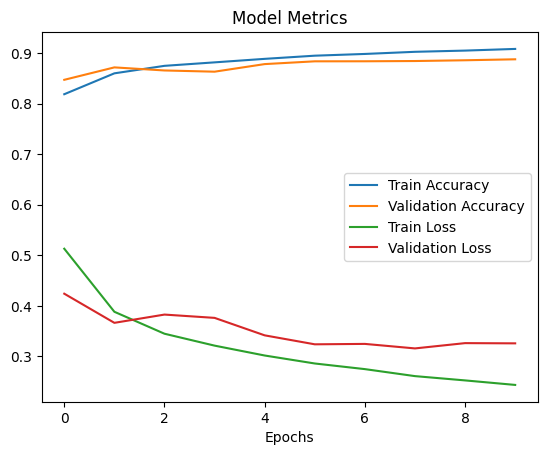

In [87]:
# Now, Plotting training history with loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')  # Add this line
plt.plot(history.history['val_loss'], label='Validation Loss')  # Add this line
plt.title('Model Metrics')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [ ]:
# Simple words:- In this assignment, I used a computer to teach itself to recognize different types of clothing in pictures.
# First, I loaded a special dataset called Fashion MNIST that had pictures of clothes like shirts, shoes, etc.
# Then, made sure the computer could understand the pictures by adjusting the colors to be between 0 and 1
# and squishing the pictures into a simpler format (flattening).

# The code taught the computer what each picture represented (like a label on clothes) using a technique called one-hot encoding.

# For the brain of our computer (the neural network), I used Keras and its functional API.
# I created layers in the neural n/w, like thinking steps, that could understand the pictures and figure out which type of clothing was in each picture.

# After setting up the neural n/w, I trained it by showing lots of pictures and correcting its guesses.
# I did this first with a regular setup and then adjusted some settings like how quickly it learns and how many pictures it looks at each time.

# Finally, tested the neural.

# USED:-
# Keras library- API, and utilized layers like Dense, Dropout, BatchNormalization, and the Adam optimizer to build the model.